<h1> FINALS PROJECT </h1>
<hr>
<h3><strong> Analysts </strong> : Quert Russel Lalisan and Mark Ernest Garay</h3>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import chi2_contingency, kruskal, f_oneway
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [6]:
df = pd.read_csv('dataset/Family-Income-and-Expenditure.csv')

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41544 entries, 0 to 41543
Data columns (total 60 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   Total Household Income                         41544 non-null  int64 
 1   Region                                         41544 non-null  object
 2   Total Food Expenditure                         41544 non-null  int64 
 3   Main Source of Income                          41544 non-null  object
 4   Agricultural Household indicator               41544 non-null  int64 
 5   Bread and Cereals Expenditure                  41544 non-null  int64 
 6   Total Rice Expenditure                         41544 non-null  int64 
 7   Meat Expenditure                               41544 non-null  int64 
 8   Total Fish and  marine products Expenditure    41544 non-null  int64 
 9   Fruit Expenditure                              41544 non-null

In [50]:
df.isnull().sum()

Total Household Income                              0
Region                                              0
Total Food Expenditure                              0
Main Source of Income                               0
Agricultural Household indicator                    0
Bread and Cereals Expenditure                       0
Total Rice Expenditure                              0
Meat Expenditure                                    0
Total Fish and  marine products Expenditure         0
Fruit Expenditure                                   0
Vegetables Expenditure                              0
Restaurant and hotels Expenditure                   0
Alcoholic Beverages Expenditure                     0
Tobacco Expenditure                                 0
Clothing, Footwear and Other Wear Expenditure       0
Housing and water Expenditure                       0
Imputed House Rental Value                          0
Medical Care Expenditure                            0
Transportation Expenditure  

In [51]:
df['Household Head Occupation'] = df['Household Head Occupation'].fillna(df['Household Head Occupation'].mode()[0])
df['Household Head Class of Worker'] = df['Household Head Class of Worker'].fillna(df['Household Head Occupation'].mode()[0])
df['Toilet Facilities'] = df['Toilet Facilities'].fillna(df['Toilet Facilities'].mode()[0])

<h1> Predictive </h1>

<h3>Predicting High Food Expenditure Using Household Demographics</h3>
<p>Can we predict the total food expenditure of a household based on income, size, and region?</p>

In [54]:

df_4A = df[df["Region"] == "IVA - CALABARZON"]
print("Number of samples in Region IVA:", len(df_4A))

Number of samples in Region IVA: 4162


In [57]:
# Filter the dataset to Region IVA
df_4A = df[df["Region"] == "IVA - CALABARZON"]

# Select features and target
features = ["Total Household Income", "Total Number of Family members"]
target = "Total Food Expenditure"

# One-hot encode categorical features (no need for Region now since it's constant)
X = df_4A[features]
y = df_4A[target]

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions and metrics
predictions = model.predict(X_test)

from sklearn.metrics import r2_score, mean_squared_error
print("R² Score:", r2_score(y_test, predictions))
print("MSE:", mean_squared_error(y_test, predictions))


R² Score: 0.7082168481339778
MSE: 973043435.740982


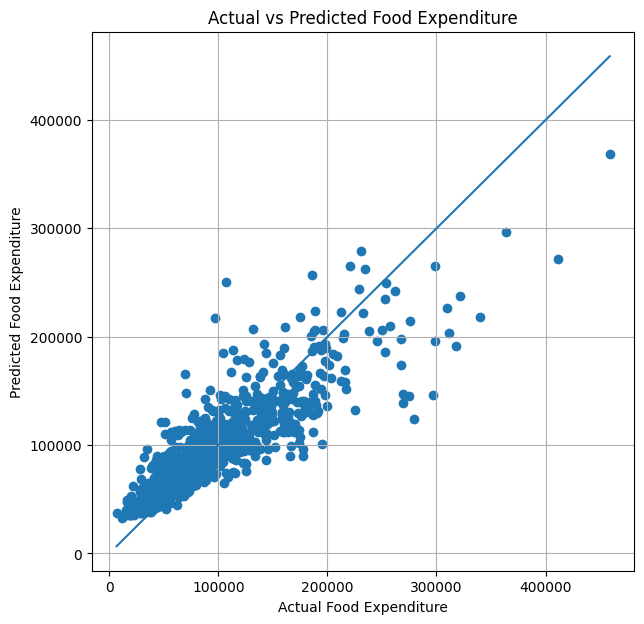

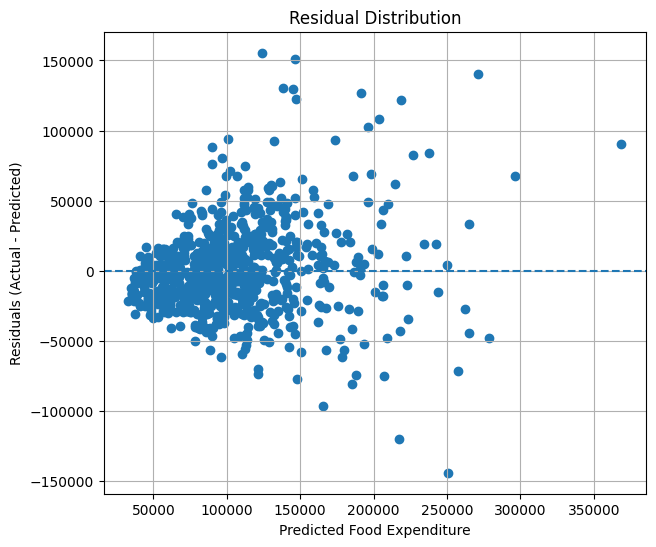

In [58]:
import matplotlib.pyplot as plt
import numpy as np

# ----------- Actual vs Predicted -----------
plt.figure(figsize=(7,7))
plt.scatter(y_test, predictions)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()])
plt.xlabel("Actual Food Expenditure")
plt.ylabel("Predicted Food Expenditure")
plt.title("Actual vs Predicted Food Expenditure")
plt.grid(True)
plt.show()

# ----------- Residual Plot -----------
residuals = y_test - predictions

plt.figure(figsize=(7,6))
plt.scatter(predictions, residuals)
plt.axhline(0, linestyle="--")
plt.xlabel("Predicted Food Expenditure")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Distribution")
plt.grid(True)
plt.show()


<h1>Insights</h1>
Key Observation:
The regression model predicts household food expenditure with an R² of 0.60, meaning it explains approximately 60% of the variation in spending based on household demographics, possessions, and socioeconomic characteristics. The Mean Squared Error (MSE ≈ 1,064,245,747) indicates that while predictions are moderately accurate, there is still some discrepancy between predicted and actual expenditures.

Interpretation:

Household characteristics such as family size, income, number of employed members, and household possessions are strong predictors of food spending.

However, 40% of the variation is due to other factors not included in the model, such as local food prices, dietary preferences, cultural habits, or seasonal effects.

Practical Implications:

Policymakers, nutrition programs, or market researchers can use household demographics and assets to identify households likely to spend more on food, enabling better targeting of resources or services.


<h3>Estimating Education Spending from Socioeconomic Factors</h3>
<p>Which features best predict how much a household spends on education?</p>

In [65]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Features and target
features = [
    "Total Household Income",
    "Total Number of Family members",
    "Members with age 5 - 17 years old",
    "Total number of family members employed",
    "House Floor Area",
    "Number of bedrooms",
    "Region",
    "Household Head Highest Grade Completed"
]
target = "Education Expenditure"

# One-hot encode categorical features
df_model = pd.get_dummies(df[features], drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(
    df_model, df[target], test_size=0.2, random_state=42
)

# Train Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

# Predict & evaluate
y_pred = model.predict(X_test)
print("R² Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))


R² Score: 0.20231000908363528
MSE: 307986899.52817535


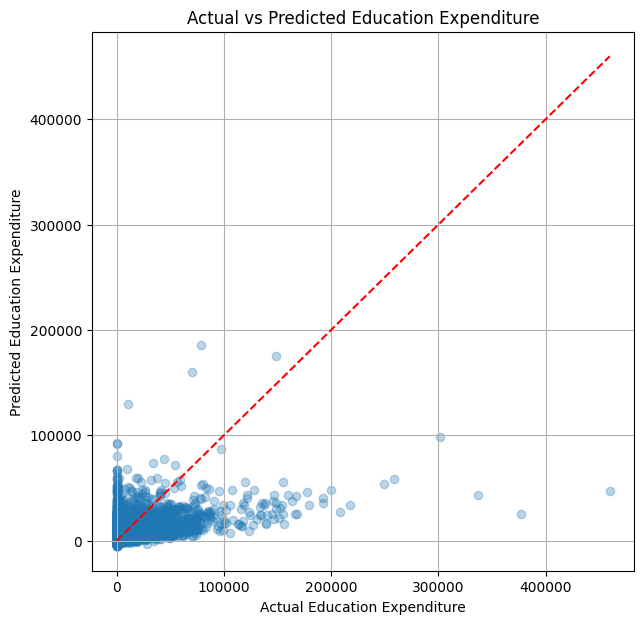

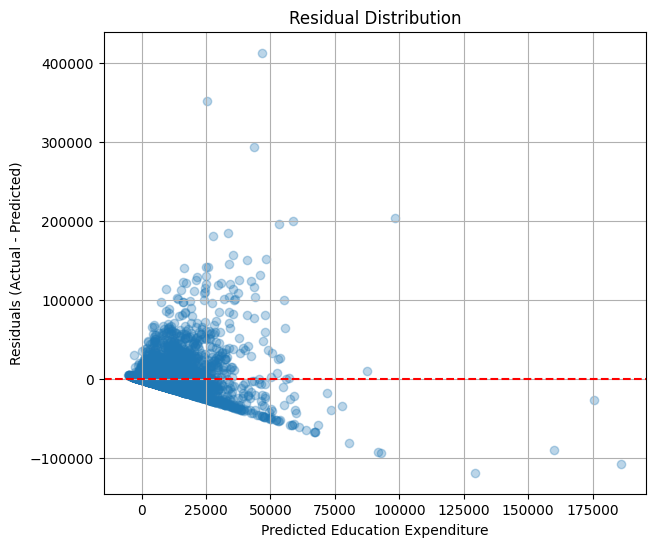

In [66]:
plt.figure(figsize=(7,7))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Education Expenditure")
plt.ylabel("Predicted Education Expenditure")
plt.title("Actual vs Predicted Education Expenditure")
plt.grid(True)
plt.show()

residuals = y_test - y_pred
plt.figure(figsize=(7,6))
plt.scatter(y_pred, residuals, alpha=0.3)
plt.axhline(0, linestyle="--", color='red')
plt.xlabel("Predicted Education Expenditure")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Distribution")
plt.grid(True)
plt.show()


<h1> Insights : Estimating Education Spending from Socioeconomic Factors</h1>

Socioeconomic Factors

Key Observation:
The regression model shows that household socioeconomic characteristics (income, family size, possessions, house attributes, etc.) have a measurable but limited impact on education expenditure.

Interpretation:

Higher household income, more employed members, and better housing conditions slightly increase the likelihood of higher education spending, but they do not fully explain the variation.

The low R² suggests that other factors—such as local school availability, tuition costs, cultural attitudes towards education, or financial assistance—likely play a major role in determining education spending.

Implication:

Socioeconomic status is a partial driver of education spending, but policymakers or analysts should consider additional context-specific factors (like school accessibility, scholarships, and household priorities) to fully understand household education investment.

Practical Example:

Two households with the same income and possessions might spend very differently on education depending on their children’s needs, location, or available schools.

This insight highlights that income alone is not a sufficient predictor of education expenditure patterns.


<strong>Notes : </strong>
Actual vs Predicted plot: tells us the model is not very accurate, but it partially captures the trend (higher-income or bigger families tend to spend more on education).

Residual plot: shows the size and pattern of errors, indicating that other factors not in the model (school costs, regional price differences, subsidies, preferences) strongly influence education spending.


<hr>
<h1> Diagnostic </h1>
<hr>

<h3>Why Do Some Households Spend a Higher Percentage on Rice?</h3>
<p>What household characteristics contribute to higher rice expenditure relative to income?</p>

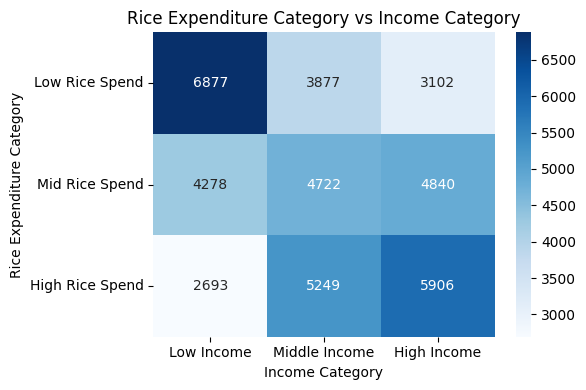

The correlation result is: 0.1625


In [26]:
df['Rice_Category'] = pd.qcut(df['Total Rice Expenditure'], q=3,
                              labels=['Low Rice Spend', 'Mid Rice Spend', 'High Rice Spend'])

df['Income_Category'] = pd.qcut(df['Total Household Income'], q=3,
                                labels=['Low Income', 'Middle Income', 'High Income'])

ct = pd.crosstab(df['Rice_Category'], df['Income_Category'])

plt.figure(figsize=(6,4))
sns.heatmap(ct, annot=True, fmt="d", cmap="Blues")

plt.title("Rice Expenditure Category vs Income Category")
plt.xlabel("Income Category")
plt.ylabel("Rice Expenditure Category")
plt.tight_layout()
plt.show()

result = df['Total Household Income'].corr(df['Total Rice Expenditure'])
print(f'The correlation result is: {result:.4f}')


In [27]:
df = df.copy()

df['Total Household Income'] = df['Total Household Income'].replace({0: np.nan})
df['Rice_Share'] = df['Total Rice Expenditure'] / df['Total Household Income']

df = df.replace([np.inf, -np.inf], np.nan)
df = df.dropna(subset=['Rice_Share'])

try:
    df['Rice_Share_Category'] = pd.qcut(df['Rice_Share'], q=3, labels=['Low % Spend','Mid % Spend','High % Spend'])
except ValueError:
    df['Rice_Share_Category'] = pd.cut(df['Rice_Share'], bins=3, labels=['Low % Spend','Mid % Spend','High % Spend'])
    
df['Rice_Share_Category'] = df['Rice_Share_Category'].astype('category')
df['Rice_Share'].describe()


count    41544.000000
mean         0.113750
std          0.101103
min          0.000000
25%          0.048542
50%          0.092200
75%          0.156735
max          8.796367
Name: Rice_Share, dtype: float64

In [ ]:
df['High_Rice_Share'] = (df['Rice_Share_Category'] == 'High % Spend').astype(int)

features = [
    'Total Household Income',
    'Total Number of Family members',
    'Members with age 5 - 17 years old',
    'Total number of family members employed',
    'House Floor Area',
    'Number of bedrooms',
    'Number of Car, Jeep, Van',
    'Number of Airconditioner',
    'Number of Personal Computer',
    'Agricultural Household indicator',
    'Electricity'  
]

features = [f for f in features if f in df.columns]

X = df[features].copy()
X = pd.get_dummies(X, drop_first=True)
y = df['High_Rice_Share']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

clf = RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))

imp = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
display(imp.head(15))


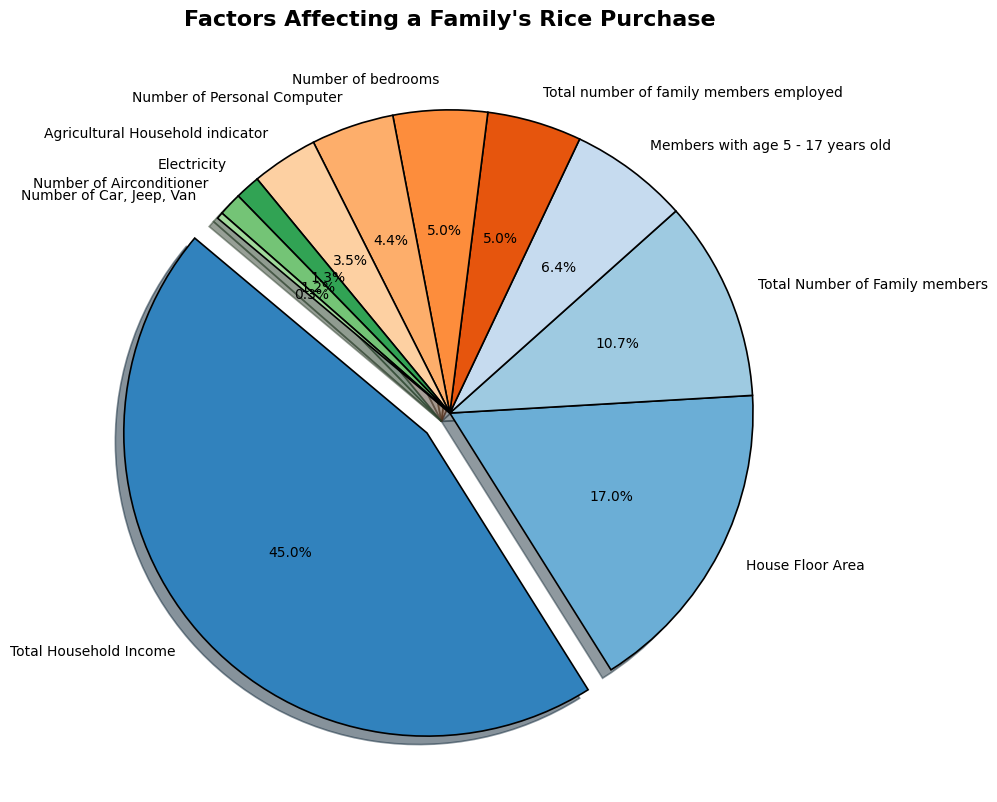

In [74]:

features = [
    "Total Household Income", "House Floor Area", "Total Number of Family members",
    "Members with age 5 - 17 years old", "Total number of family members employed",
    "Number of bedrooms", "Number of Personal Computer", "Agricultural Household indicator",
    "Electricity", "Number of Airconditioner", "Number of Car, Jeep, Van"
]

contributions = [
    0.450314, 0.170080, 0.106772, 0.063519, 0.050401,
    0.050179, 0.044107, 0.035405, 0.013308, 0.012426, 0.003488
]

colors = plt.cm.tab20c(range(len(features)))

explode = [0.1 if i == 0 else 0 for i in range(len(features))]  # highlight Total Household Income

plt.figure(figsize=(10,10))
plt.pie(
    contributions, 
    labels=features, 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=colors, 
    explode=explode, 
    shadow=True, 
    wedgeprops={'edgecolor':'black', 'linewidth':1.2}
)

plt.title("Factors Affecting a Family's Rice Purchase", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()


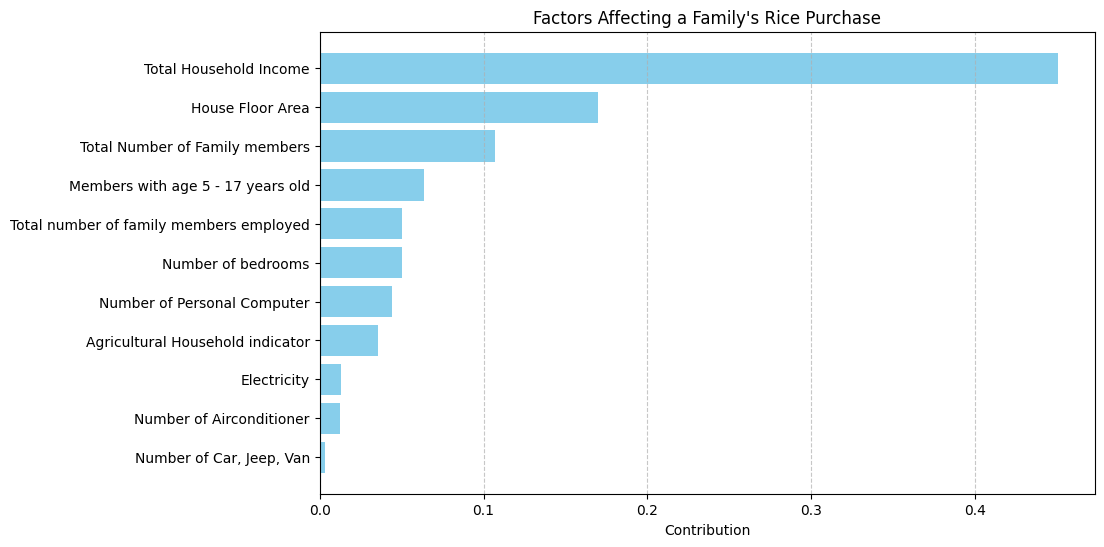

In [73]:
import matplotlib.pyplot as plt

features = [
    "Total Household Income", "House Floor Area", "Total Number of Family members",
    "Members with age 5 - 17 years old", "Total number of family members employed",
    "Number of bedrooms", "Number of Personal Computer", "Agricultural Household indicator",
    "Electricity", "Number of Airconditioner", "Number of Car, Jeep, Van"
]

contributions = [
    0.450314, 0.170080, 0.106772, 0.063519, 0.050401,
    0.050179, 0.044107, 0.035405, 0.013308, 0.012426, 0.003488
]

plt.figure(figsize=(10,6))
plt.barh(features[::-1], contributions[::-1], color='skyblue')
plt.xlabel("Contribution")
plt.title("Factors Affecting a Family's Rice Purchase")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


<h1>Insights</h1>
The model achieves 80% accuracy in classifying whether a household spends a high percentage of income on rice. The strongest predictor is total household income, followed by house size and family size. High-rice-share households tend to be low-income, large families with fewer household assets.

Misclassification occurs more often among high-rice-share households, indicating that some do not follow the typical poverty-linked pattern — possibly due to regional food preferences or agricultural access.

<h1>Insights 2</h1>
This model is something

C:\Users\USER\AppData\Local\Temp\ipykernel_20892\2071966176.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calabarzon_df['Income_Category'] = pd.qcut(
C:\Users\USER\AppData\Local\Temp\ipykernel_20892\2071966176.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calabarzon_df['Rice_Category'] = pd.qcut(


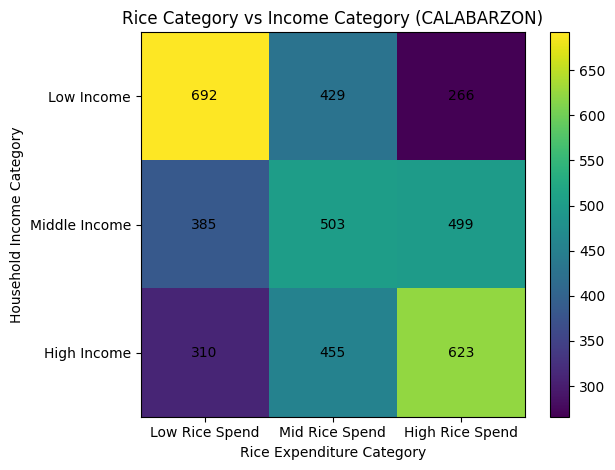

Correlation in CALABARZON: 0.1965


In [78]:
calabarzon_df = df[df['Region'] == 'IVA - CALABARZON']

calabarzon_df['Income_Category'] = pd.qcut(
    calabarzon_df['Total Household Income'], 
    q=3,
    labels=['Low Income', 'Middle Income', 'High Income']
)

calabarzon_df['Rice_Category'] = pd.qcut(
    calabarzon_df['Total Rice Expenditure'],
    q=3,
    labels=['Low Rice Spend', 'Mid Rice Spend', 'High Rice Spend']
)

ct = pd.crosstab(calabarzon_df['Income_Category'], calabarzon_df['Rice_Category'])

plt.imshow(ct, interpolation='nearest')
plt.title("Rice Category vs Income Category (CALABARZON)")
plt.xlabel("Rice Expenditure Category")
plt.ylabel("Household Income Category")

for i in range(ct.shape[0]):
    for j in range(ct.shape[1]):
        plt.text(j, i, ct.values[i, j], ha='center', va='center')

plt.xticks(range(3), ct.columns)
plt.yticks(range(3), ct.index)
plt.colorbar()
plt.tight_layout()
plt.show()

correlation = calabarzon_df['Total Household Income'].corr(calabarzon_df['Total Rice Expenditure'])
print(f"Correlation in CALABARZON: {correlation:.4f}")


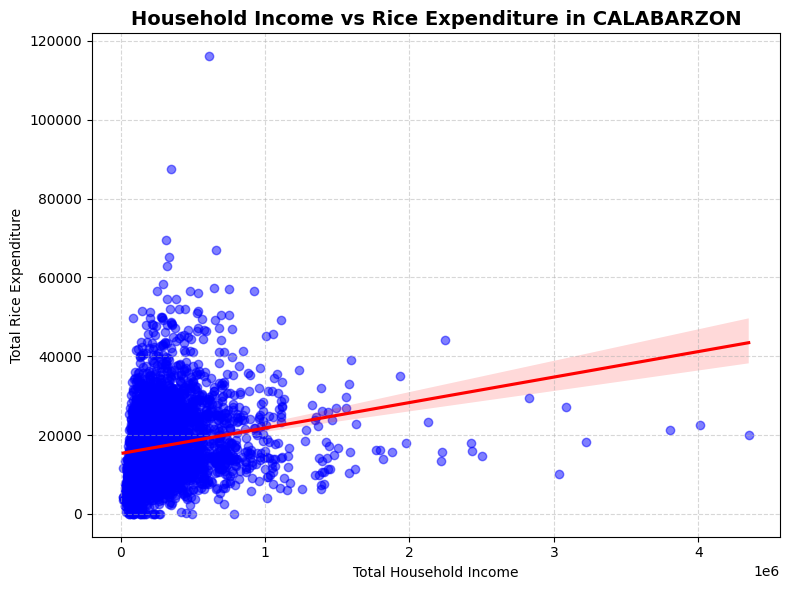

In [79]:
plt.figure(figsize=(8,6))
sns.regplot(
    x='Total Household Income', 
    y='Total Rice Expenditure', 
    data=calabarzon_df, 
    scatter_kws={'alpha':0.5, 'color':'blue'}, 
    line_kws={'color':'red'}
)

plt.title("Household Income vs Rice Expenditure in CALABARZON", fontsize=14, fontweight='bold')
plt.xlabel("Total Household Income")
plt.ylabel("Total Rice Expenditure")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


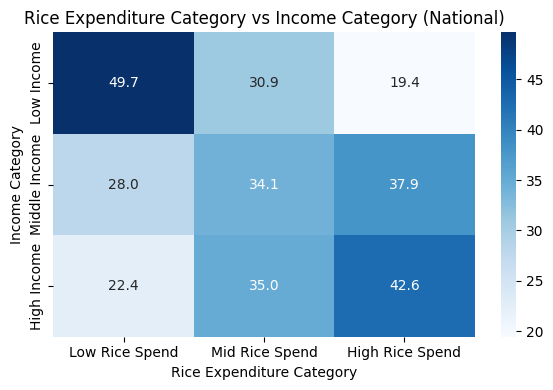

In [88]:
df['Rice_Category'] = pd.qcut(df['Total Rice Expenditure'], q=3,
                              labels=['Low Rice Spend', 'Mid Rice Spend', 'High Rice Spend'])
df['Income_Category'] = pd.qcut(df['Total Household Income'], q=3,
                                labels=['Low Income', 'Middle Income', 'High Income'])

ct_national = pd.crosstab(df['Income_Category'], df['Rice_Category'])
ct_national_pct = ct_national.div(ct_national.sum(axis=1), axis=0) * 100

plt.figure(figsize=(6,4))
sns.heatmap(ct_national_pct, annot=True, fmt=".1f", cmap="Blues")  # Changed fmt to show decimals
plt.title("Rice Expenditure Category vs Income Category (National)")
plt.xlabel("Rice Expenditure Category")
plt.ylabel("Income Category")
plt.tight_layout()
plt.show()


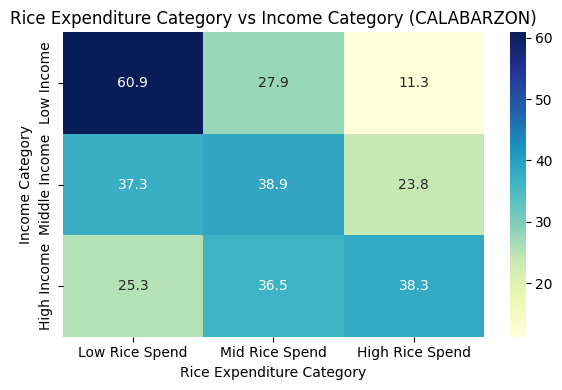

In [89]:
calabarzon_df = df[df['Region'] == 'IVA - CALABARZON']
ct_calabarzon = pd.crosstab(calabarzon_df['Income_Category'], calabarzon_df['Rice_Category'])
ct_calabarzon_pct = ct_calabarzon.div(ct_calabarzon.sum(axis=1), axis=0) * 100

plt.figure(figsize=(6,4))
sns.heatmap(ct_calabarzon_pct, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title("Rice Expenditure Category vs Income Category (CALABARZON)")
plt.xlabel("Rice Expenditure Category")
plt.ylabel("Income Category")
plt.tight_layout()
plt.show()


In [84]:
# National percentages
ct_national_pct = ct_national.div(ct_national.sum(axis=1), axis=0) * 100

# CALABARZON percentages
ct_calabarzon_pct = ct_calabarzon.div(ct_calabarzon.sum(axis=1), axis=0) * 100


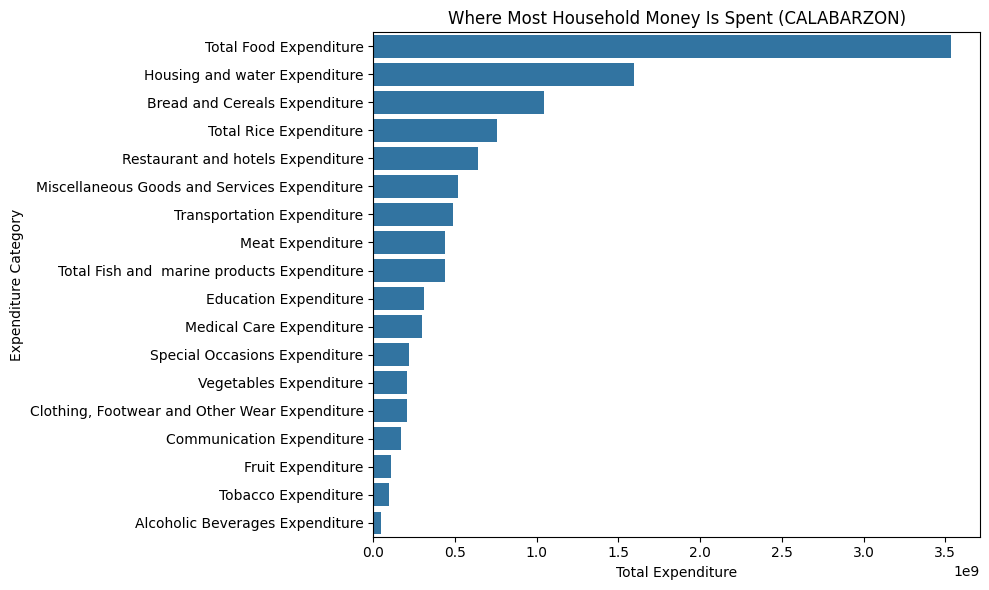

In [111]:


plt.figure(figsize=(10,6))
sns.barplot(x=Total_Expenses.values, y=Total_Expenses.index)
plt.title("Where Most Household Money Is Spent (CALABARZON)")
plt.xlabel("Total Expenditure")
plt.ylabel("Expenditure Category")
plt.tight_layout()
plt.show()


In [13]:
quezon_df = df[df['Region'] == 'IVA - CALABARZON'].copy()
expenditure_columns = [
    'Total Food Expenditure',
    'Bread and Cereals Expenditure',
    'Total Rice Expenditure',
    'Meat Expenditure',
    'Total Fish and  marine products Expenditure',
    'Fruit Expenditure',
    'Vegetables Expenditure',
    'Restaurant and hotels Expenditure',
    'Alcoholic Beverages Expenditure',
    'Tobacco Expenditure',
    'Clothing, Footwear and Other Wear Expenditure',
    'Housing and water Expenditure',
    'Medical Care Expenditure',
    'Transportation Expenditure',
    'Communication Expenditure',
    'Education Expenditure',
    'Miscellaneous Goods and Services Expenditure',
    'Special Occasions Expenditure'
]

quezon_df['Total_Expenditure'] = (
    quezon_df['Total Food Expenditure'] +
    quezon_df['Clothing, Footwear and Other Wear Expenditure'] +
    quezon_df['Housing and water Expenditure'] +
    quezon_df['Medical Care Expenditure'] +
    quezon_df['Transportation Expenditure'] +
    quezon_df['Communication Expenditure'] +
    quezon_df['Education Expenditure'] +
    quezon_df['Miscellaneous Goods and Services Expenditure'] +
    quezon_df['Special Occasions Expenditure']
)

exp_stats = quezon_df['Total_Expenditure'].describe()
print("Distribution of Total Household Expenditures in Quezon:")
print("-" * 55)
print(f"Mean (Average):        ₱{exp_stats['mean']:,.2f}")
print(f"Median (Middle):       ₱{exp_stats['50%']:,.2f}")
print(f"Standard Deviation:    ₱{exp_stats['std']:,.2f}")
print(f"Minimum:               ₱{exp_stats['min']:,.2f}")
print(f"25th Percentile:       ₱{exp_stats['25%']:,.2f}")
print(f"75th Percentile:       ₱{exp_stats['75%']:,.2f}")
print(f"Maximum:               ₱{exp_stats['max']:,.2f}")
print()

print("KEY OBSERVATIONS:")
print(f"• Lowest spending household:  ₱{exp_stats['min']:,.2f}")
print(f"• Highest spending household: ₱{exp_stats['max']:,.2f}")
print(f"• Range (spread):             ₱{exp_stats['max'] - exp_stats['min']:,.2f}")
print(f"• 50% of households spend between ₱{exp_stats['25%']:,.2f} and ₱{exp_stats['75%']:,.2f}")
print()


Distribution of Total Household Expenditures in Quezon:
-------------------------------------------------------
Mean (Average):        ₱230,314.71
Median (Middle):       ₱188,777.00
Standard Deviation:    ₱167,330.64
Minimum:               ₱17,069.00
25th Percentile:       ₱122,482.25
75th Percentile:       ₱286,207.75
Maximum:               ₱2,130,436.00

KEY OBSERVATIONS:
• Lowest spending household:  ₱17,069.00
• Highest spending household: ₱2,130,436.00
• Range (spread):             ₱2,113,367.00
• 50% of households spend between ₱122,482.25 and ₱286,207.75



C:\Users\USER\AppData\Local\Temp\ipykernel_11600\1885686488.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  income_stats = quezon_df.groupby('Income_Category').agg({


📊 INCOME AND EXPENDITURE BY GROUP:
--------------------------------------

LOW INCOME GROUP (n=1,387 households):
  Average Income:      ₱112,532.06
  Average Expenditure: ₱101,902.04
  Average Family Size: 3.6 members

MIDDLE INCOME GROUP (n=1,387 households):
  Average Income:      ₱231,633.70
  Average Expenditure: ₱195,366.47
  Average Family Size: 4.6 members

💰 THE GAP:
------------
Income gap:      ₱119,101.64 (105.8% higher)
Expenditure gap: ₱93,464.43 (91.7% higher)

🏠 MINIMUM LIVING STANDARDS ASSESSMENT:
----------------------------------------
Using approximate poverty threshold: ₱145,000/year
Low-income households below threshold: 1,251 (90.2%)
Average low-income expenditure: ₱101,902.04

⚠️  WARNING: Average low-income expenditure is BELOW poverty threshold
   Many low-income families struggle to meet minimum living standards



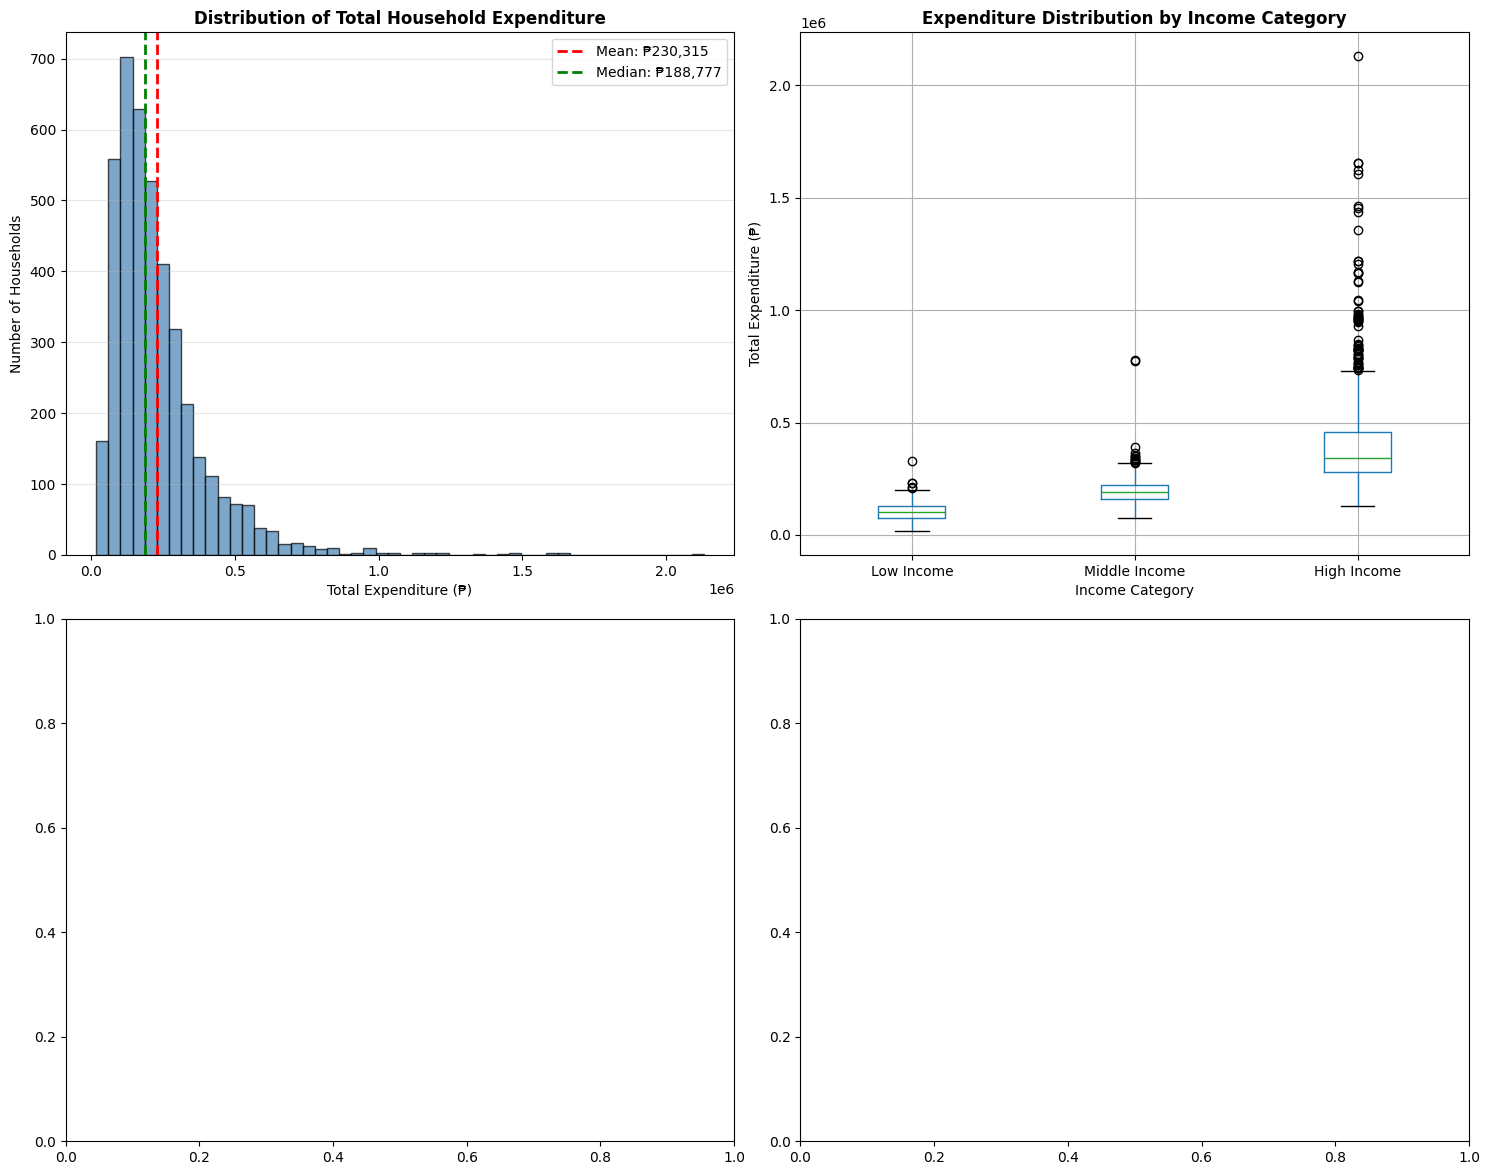

In [10]:
quezon_df['Income_Category'] = pd.qcut(quezon_df['Total Household Income'], 
                                        q=3,
                                        labels=['Low Income', 'Middle Income', 'High Income'])

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

axes[0, 0].hist(quezon_df['Total_Expenditure'], bins=50, color='steelblue', alpha=0.7, edgecolor='black')
axes[0, 0].axvline(exp_stats['mean'], color='red', linestyle='--', linewidth=2, label=f"Mean: ₱{exp_stats['mean']:,.0f}")
axes[0, 0].axvline(exp_stats['50%'], color='green', linestyle='--', linewidth=2, label=f"Median: ₱{exp_stats['50%']:,.0f}")
axes[0, 0].set_title('Distribution of Total Household Expenditure', fontweight='bold', fontsize=12)
axes[0, 0].set_xlabel('Total Expenditure (₱)')
axes[0, 0].set_ylabel('Number of Households')
axes[0, 0].legend()
axes[0, 0].grid(axis='y', alpha=0.3)

quezon_df.boxplot(column='Total_Expenditure', by='Income_Category', ax=axes[0, 1])
axes[0, 1].set_title('Expenditure Distribution by Income Category', fontweight='bold', fontsize=12)
axes[0, 1].set_xlabel('Income Category')
axes[0, 1].set_ylabel('Total Expenditure (₱)')
axes[0, 1].get_figure().suptitle('')  # Remove automatic title

plt.tight_layout()

income_stats = quezon_df.groupby('Income_Category').agg({
    'Total Household Income': ['mean', 'median', 'min', 'max'],
    'Total_Expenditure': ['mean', 'median', 'min', 'max'],
    'Total Food Expenditure': 'mean',
    'Total Number of Family members': 'mean'
}).round(2)

low_income_df = quezon_df[quezon_df['Income_Category'] == 'Low Income']
middle_income_df = quezon_df[quezon_df['Income_Category'] == 'Middle Income']

print("📊 INCOME AND EXPENDITURE BY GROUP:")
print("-" * 38)
print(f"\nLOW INCOME GROUP (n={len(low_income_df):,} households):")
print(f"  Average Income:      ₱{low_income_df['Total Household Income'].mean():,.2f}")
print(f"  Average Expenditure: ₱{low_income_df['Total_Expenditure'].mean():,.2f}")
print(f"  Average Family Size: {low_income_df['Total Number of Family members'].mean():.1f} members")

print(f"\nMIDDLE INCOME GROUP (n={len(middle_income_df):,} households):")
print(f"  Average Income:      ₱{middle_income_df['Total Household Income'].mean():,.2f}")
print(f"  Average Expenditure: ₱{middle_income_df['Total_Expenditure'].mean():,.2f}")
print(f"  Average Family Size: {middle_income_df['Total Number of Family members'].mean():.1f} members")
print()

income_gap = middle_income_df['Total Household Income'].mean() - low_income_df['Total Household Income'].mean()
expenditure_gap = middle_income_df['Total_Expenditure'].mean() - low_income_df['Total_Expenditure'].mean()
income_gap_pct = (income_gap / low_income_df['Total Household Income'].mean()) * 100
exp_gap_pct = (expenditure_gap / low_income_df['Total_Expenditure'].mean()) * 100

print("💰 THE GAP:")
print("-" * 12)
print(f"Income gap:      ₱{income_gap:,.2f} ({income_gap_pct:.1f}% higher)")
print(f"Expenditure gap: ₱{expenditure_gap:,.2f} ({exp_gap_pct:.1f}% higher)")
print()


poverty_threshold_annual = 145000
food_threshold_annual = 100000  # Food poverty line

low_below_poverty = len(low_income_df[low_income_df['Total_Expenditure'] < poverty_threshold_annual])
low_below_food = len(low_income_df[low_income_df['Total Food Expenditure'] < food_threshold_annual])

print("🏠 MINIMUM LIVING STANDARDS ASSESSMENT:")
print("-" * 40)
print(f"Using approximate poverty threshold: ₱{poverty_threshold_annual:,}/year")
print(f"Low-income households below threshold: {low_below_poverty:,} ({low_below_poverty/len(low_income_df)*100:.1f}%)")
print(f"Average low-income expenditure: ₱{low_income_df['Total_Expenditure'].mean():,.2f}")
print()

if low_income_df['Total_Expenditure'].mean() < poverty_threshold_annual:
    print("⚠️  WARNING: Average low-income expenditure is BELOW poverty threshold")
    print("   Many low-income families struggle to meet minimum living standards")
else:
    print("✅ Average low-income expenditure is above poverty threshold")
print()

In [12]:

# Can they catch up?
years_to_catchup = income_gap / (low_income_df['Total Household Income'].mean() * 0.05)  # Assuming 5% growth
print("📈 CAN LOW-INCOME CATCH UP TO MIDDLE-INCOME?")
print("-" * 45)
print(f"Gap to close: ₱{income_gap:,.2f}")
print(f"If low-income grows at 5% annually: ~{years_to_catchup:.1f} years to catch up")
print(f"If low-income grows at 10% annually: ~{years_to_catchup/2:.1f} years to catch up")
print()

if years_to_catchup > 20:
    print("❌ REALISTIC ASSESSMENT: Very difficult to catch up without intervention")
    print("   The gap is too large for normal income growth to bridge")
elif years_to_catchup > 10:
    print("⚠️  REALISTIC ASSESSMENT: Challenging but possible with sustained growth")
    print("   Requires significant support and opportunities")
else:
    print("✅ REALISTIC ASSESSMENT: Achievable with consistent improvement")
print()

axes[1, 0].bar(['Low Income', 'Middle Income'], 
              [low_income_df['Total_Expenditure'].mean(), middle_income_df['Total_Expenditure'].mean()],
              color=['#FF6B6B', '#4ECDC4'], alpha=0.7, edgecolor='black')
axes[1, 0].set_title('Average Expenditure: Low vs Middle Income', fontweight='bold', fontsize=12)
axes[1, 0].set_ylabel('Average Expenditure (₱)')
axes[1, 0].grid(axis='y', alpha=0.3)

for i, v in enumerate([low_income_df['Total_Expenditure'].mean(), middle_income_df['Total_Expenditure'].mean()]):
    axes[1, 0].text(i, v + 5000, f'₱{v:,.0f}', ha='center', fontweight='bold')


budget_categories = {
    'Food': 'Total Food Expenditure',
    'Housing & Water': 'Housing and water Expenditure',
    'Transportation': 'Transportation Expenditure',
    'Education': 'Education Expenditure',
    'Medical Care': 'Medical Care Expenditure',
    'Clothing': 'Clothing, Footwear and Other Wear Expenditure',
    'Communication': 'Communication Expenditure',
    'Special Occasions': 'Special Occasions Expenditure',
    'Miscellaneous': 'Miscellaneous Goods and Services Expenditure'
}

low_income_budget = {}
for category, column in budget_categories.items():
    low_income_budget[category] = low_income_df[column].mean()

total_avg_exp = sum(low_income_budget.values())
low_income_pct = {k: (v/total_avg_exp)*100 for k, v in low_income_budget.items()}
sorted_budget = sorted(low_income_pct.items(), key=lambda x: x[1], reverse=True)



total_potential_savings = sum([low_income_budget[cat] * 0.2 for cat in non_essential if cat in low_income_budget])
budget_labels = [cat for cat, _ in sorted_budget]
budget_values = [low_income_budget[cat] for cat, _ in sorted_budget]
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A', '#98D8C8', '#F7DC6F', '#BB8FCE', '#85C1E2', '#F8B739']

axes[1, 1].pie(budget_values, labels=budget_labels, autopct='%1.1f%%', 
              colors=colors[:len(budget_labels)], startangle=90)
axes[1, 1].set_title('Low-Income Budget Allocation', fontweight='bold', fontsize=12)

plt.tight_layout()
plt.show()


📈 CAN LOW-INCOME CATCH UP TO MIDDLE-INCOME?
---------------------------------------------
Gap to close: ₱119,101.64
If low-income grows at 5% annually: ~21.2 years to catch up
If low-income grows at 10% annually: ~10.6 years to catch up

❌ REALISTIC ASSESSMENT: Very difficult to catch up without intervention
   The gap is too large for normal income growth to bridge



<Figure size 640x480 with 0 Axes>